# Feature selection

When you are done creating hundreds of thousands of features, it's time for selecting a few of them . for training the model. Having too many features pose a problem well known as the curse of dimensionality. If you have a lot of features , you must also have alot of training samples to capture all the features. what's considered a "lot" is not defined correctly and it is upto us to figure out by validating our models properly and checking how much time it takes to train your models.

The simplest form of selecting features would be to **remove features with very low variance.** If the features have a low variance (i.e, very close to 0), they are close to being constant and thus , do not add any values to any model at all. It would be nice to get rid of them and hence lower the complexity. 

Also note that the variance also depends on scaling of the data. Scikit-learn has an implementation for **VarianceThreshold** that does precisely this.

If the variance is low or close to zero, then a feature is approximately constant and will not improve the performance of the model. In that case, it should be removed.

Or if only a handful of observations differ from a constant value, the variance will also be very low.

This situation, where a feature has been poorly evaluated, or brings little information because it is (almost) constant can be a justification to remove a column.

Otherwise, you have to set an arbitrarily variance threshold to determine which features to be remove. And, using the accuracy of the predictions as a result of a feature removal to prove that justification for feature removal is correct. Basically, its a trial and error.

The variance threshold calculation depends on the probability density function of a particular distribution. For example if a feature has a normal distribution, use normal variance.

Given in your problem statement, for a feature that has 95% or more variability, it is very close to zero. Hence, the feature will not help the performance of the model to predict the target. Therefore, it should be removed.

Variance threshold for feature selection:

- low variance features contains less information
- calculate variance of each feature, then drop features with variance below some threshold

As an example, suppose that we have a dataset with boolean features, and we want to remove all features that are either one or zero (on or off) in more than 80% of the samples. Boolean features are Bernoulli random variables, and the variance of such variables is given by

Boolean features are Bernoulli random variables, and the variance of such variables is given by

Var[X] = p * (1-p)

where p = probability of X = P(X)

and q = probability of not X = 1 - p

so we can select using the threshold .8 * (1 - .8) :

from sklearn.feature_selection import VarianceThreshold

X = [[0, 0, 1], [0, 1, 0], [1, 0, 0], [0, 1, 1], [0, 1, 0], [0, 1, 1]]

sel = VarianceThreshold(threshold=(.8 * (1 - .8)))

sel.fit_transform(X)

array([[0, 1],
       [1, 0],
       [0, 0],
       [1, 1],
       [1, 0],
       [1, 1]])
       
As expected, VarianceThreshold has removed the first column, which has a probability p = 5/6 > 0.8 of containing a zero.

In [ ]:
from sklearn.feature_selection import VarianceThreshold

data = .... 
var_thresh = VarianceThreshold(threshold= 0.1)
transformed_data = var_thresh.fit_transform(data)

# Transformed data will have all columns with variance less than 0.1 removed

we can also removed features which have a high correlation. for calculating the correlation between different numerical features, we can use the **Pearson correlation**

In [4]:
import pandas as pd 
from sklearn.datasets import fetch_california_housing
import numpy as np 

# fetch a regression dataset
data = fetch_california_housing()

x = data['data']
col_names = data['feature_names']
y = data['target']

# convert to pandas dataframe 
df = pd.DataFrame(x , columns=col_names)

# introduce a highly correlated column
df.loc[: , 'MedInc_Sqrt'] = df.MedInc.apply(np.sqrt)

# get correlation matrix (pearson)
df.corr()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedInc_Sqrt
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176,0.984329
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197,-0.132797
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540,0.326688
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344,-0.066910
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773,0.018415
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476,0.015266
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664,-0.084303
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000,-0.015569
MedInc_Sqrt,0.984329,-0.132797,0.326688,-0.066910,0.018415,0.015266,-0.084303,-0.015569,1.000000


we see that the feature **"MedInc_Sqrt"** has a very high correlation with **"MedInc"**. we can remove one of them

And now we can move to some univariate ways of feature selection. **univariate feature selection** is nothing but a scoring of each feautre against a given target.

**Mutual information, ANOVA F-test** and **$chi^2$** are some of the most popular methods for univariate feature selection. There are two ways of using these in scikit-learn.

- **SelectKBest**: It keeps the top-k scoring features
- **SelectPrecentile**: It keeps the top features which are in a percentage specified by the user

It must b noted that you can use $chi^2$ only for data which is non-negative in nature. This is a particularly useful feature selection technique in natural language processing when we have a bag of words or tf-idf based features. It's best to create a wrapper for univariate feature selection that you can use for almost any new problem

In [15]:
 import UnivariateFeatureSelection as ufs 
 
 # initializing the instance
 uni_sel = ufs.UnivariateFeatureSelection(
     n_features = 0.9,
     problem_type = 'regression',
     scoring = 'f_regression'
 )


In [16]:
uni_sel.fit(x ,y)

SelectPercentile(percentile=90,
                 score_func=&lt;function f_regression at 0x00000178F6D99438&gt;)

In [17]:
x_transformed = uni_sel.transform(x)

In [18]:
x_transformed.shape

(20640, 7)

## Greedy feature selection

Most of the time , people prefer doing feature selection using a machine learning model. let's see how that is done
The simplest form of feature selection that uses a model for selection is known as **greedy feature selection**. In greedy feature selection. 

The first step is to choose a model. The second step is to select a loss/scoring function. And the third and final step is to iteratively evaluate each feature and add it to the list of **"good"** features if it improves loss/score. 

But you must keep this inmind that this is known as greedy feature selection for a reason. This feature selection process will fit a given model each time it evaluates a feature. The computational cost associate with this kind of method is very high. It will also take a lot of time for this kind of feature selection to finish. and if you do not use this feature selection properly . then you might even end up overfitting the model.


## Recursive feature elimination

Another greedy approach is know as **"recursive feature elimination"(RTE)**. In the previous method , we started with one feature and kept adding new features, but in RFE, we start with all features and keep removing one feature in every iteration that provides the least value to a given model. BUt how to do we know which feature offers the least value? well , if we use models like linear support vector machine(SVM) or logistic regression, we get a coeeficient for each feature which decides the importance of features. In case of any tree based models , we get feature importance in palce of coeeficients. In each iteration, we can eliminate the least important feature and keep eliminating it until we reach the number of features needed. 

When we are doing recursive feature elimination, in each iteration, we remove the feature which has the least feature importance or the feature which has a coeeficient close to 0. remember that when you use a model like logistic regression for binary classification, the coeeficients for features are more positive if they are important for the positive class and more negative if they are important for the negative class.

Scikit-learn also provides RFE out of the box. A simple usage is shown below

In [1]:
import pandas as pd 

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.datasets import fetch_california_housing

# fetch a regression dataset
data = fetch_california_housing()
x = data['data']
col_names = data['feature_names']
y = data['target']

# initialize the model
model = LinearRegression()
# initialize RFE
rfe = RFE(
    estimator=model,
    n_features_to_select= 3
)

# fit RFE
rfe.fit(x ,y)

# get the transformed data with selected columns

x_transformed = rfe.transform(x)

In [2]:
x_transformed

array([[   8.3252,   37.88  , -122.23  ],
       [   8.3014,   37.86  , -122.22  ],
       [   7.2574,   37.85  , -122.24  ],
       ...,
       [   1.7   ,   39.43  , -121.22  ],
       [   1.8672,   39.43  , -121.32  ],
       [   2.3886,   39.37  , -121.24  ]])

We saw two different greedy ways to select features from a model. But you can also fit the model to the data and select features from the model by the **feature coefficients or the importance of features.** If you use coefficient, you can select a threshold, and if the coefficient is above that threshold, you can keep the feature else eliminate it.

Let's see how we can get feature importance from a model like random forest.

In [3]:
import pandas as pd 
from sklearn.datasets import load_diabetes
from sklearn.ensemble import RandomForestRegressor
# fetch a regression dataset in diabetes data we predict diabetes progression
# after one year based on some features
data = load_diabetes()
x = data['data']
col_names = data['feature_names']
y = data['target']

# initialize the model
model = RandomForestRegressor()
# fit the model
model.fit(x,y)

RandomForestRegressor()

feature importance from random forest(or any model) can be plotted as follows

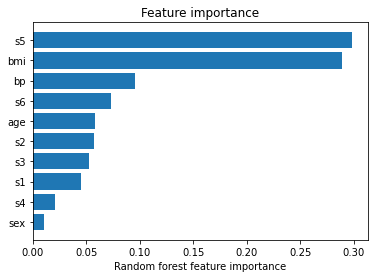

In [7]:
import matplotlib.pyplot as plt 
import numpy as np
importance = model.feature_importances_
idxs = np.argsort(importance)
plt.title('Feature importance')
plt.barh(range(len(idxs)), importance[idxs] , align = 'center')
plt.yticks(range(len(idxs)) , [col_names[i] for i in idxs])
plt.xlabel('Random forest feature importance')
plt.show()

well, selecting the best features from the model is nothing new. you can chhose features from one model and use another to train. For example, you can use Logistic Regression coefficients to select the feature and then use Random Forest to train the model on choosen features.

Scikit-learn also offers **SelectFromModel** class that helps you choose features dirctly from a given model. you can specify the threshold for coefficients or feature importance if you want and the maximum number of features you want to select.

In [8]:
import pandas as pd 
from sklearn.datasets import load_diabetes
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectFromModel

# fetch a regression dataset in diabetes data we predict diabetes progression
# after one year based on some features
data = load_diabetes()
x = data['data']
col_names = data['feature_names']
y = data['target']

# intialize the model
model = RandomForestRegressor()

# select fro the model
sfm = SelectFromModel(estimator= model)
x_transformed = sfm.fit_transform(x ,y)

# see which features were selected
support = sfm.get_support()

# get feature names
print([
    x for x,y in zip(col_names , support) if y == True
])

[&#39;bmi&#39;, &#39;s5&#39;]
